In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import cancer_data
import many

import config

config.config_visuals()

In [2]:
ccle_genex = cancer_data.load("ccle_gene_tpm")
ccle_transcripts = cancer_data.load("ccle_transcript_tpm")
exonusage = cancer_data.load("ccle_exonusage")
rppa = cancer_data.load("ccle_rppa")
ms_prot = cancer_data.load("ccle_proteomics")

mdm4_exon_6 = exonusage[
    [
        "MDM4_3p_chr1_204506558_204506625_ENSG00000198625.8",
        "MDM4_5p_chr1_204506558_204506625_ENSG00000198625.8",
    ]
].mean(axis=1)

avana = cancer_data.load("avana")
drive = cancer_data.load("drive")

tcga_genex = cancer_data.load("tcga_normalized_gene_expression")

tcga_se = cancer_data.load("tcga_se")
# keep first four identifier fields
tcga_se.index = tcga_se.index.map(lambda x: "-".join(x.split("-")[:4]))
# remove last letter
tcga_se.index = tcga_se.index.map(lambda x: x[:-1])
tcga_se = tcga_se[tcga_se.index.map(lambda x: x[-2:] != "11")]

tcga_se = tcga_se.loc[~tcga_se.index.duplicated(keep="first")]

tcga_a3ss = cancer_data.load("tcga_a3ss")
# keep first four identifier fields
tcga_a3ss.index = tcga_a3ss.index.map(lambda x: "-".join(x.split("-")[:4]))
# remove last letter
tcga_a3ss.index = tcga_a3ss.index.map(lambda x: x[:-1])
tcga_a3ss = tcga_a3ss[tcga_a3ss.index.map(lambda x: x[-2:] != "11")]

tcga_a3ss = tcga_a3ss.loc[~tcga_a3ss.index.duplicated(keep="first")]

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
rpl22l1_exonusage = many.stats.mat_corr_nan(
    ccle_genex["RPL22L1_ENSG00000163584.13"],
    exonusage,
    method="pearson",
    melt=True,
)

Text(0, 0.5, 'UBAP2L chr1:154242676-154243329')

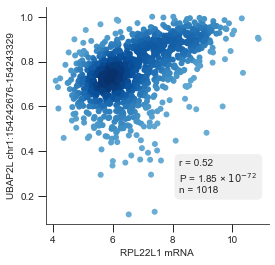

In [85]:
plt.figure(figsize=(4,4))

many.visuals.dense_regression(
    ccle_genex["RPL22L1_ENSG00000163584.13"],
    exonusage["UBAP2L_5p_chr1_154242676_154243329_ENSG00000143569.14"],
    "spearman",
    colormap="Blues",
    cmap_offset=1,
    text_pos=(0.6,0.3),
)

plt.xlabel("RPL22L1 mRNA")
plt.ylabel("UBAP2L exon 30 (chr1:154242676-154243329)")

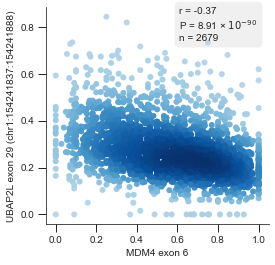

In [5]:
plt.figure(figsize=(4, 4))

many.visuals.dense_regression(
    tcga_se[
        "ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_se[
        "ENSG00000143569.14_ES_1_154241382:154241430:154241837:154241888:154242675:154243040_154241837:154241888"
    ],
    "spearman",
    colormap="Blues",
    cmap_offset=1,
    text_pos=(0.6, 1),
)

plt.xlabel("MDM4 exon 6")
plt.ylabel("UBAP2L exon 29 (chr1:154241837:154241888)")

plt.savefig("../plots/TCGA_MDM4-6_UBAP2L-29.pdf", bbox_inches="tight", dpi=512)

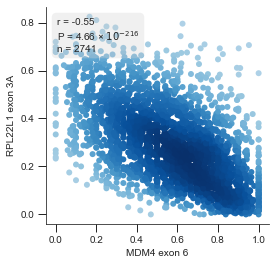

In [8]:
plt.figure(figsize=(4, 4))

many.visuals.dense_regression(
    tcga_se[
        "ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    1-tcga_a3ss[
        "ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
    ],
    "spearman",
    colormap="Blues",
    cmap_offset=1,
    text_pos=(0.05, 0.95),
)

plt.xlabel("MDM4 exon 6")
plt.ylabel("RPL22L1 exon 3A")

plt.savefig("../plots/TCGA_MDM4-6_RPL22L1-3A.pdf", bbox_inches="tight", dpi=512)

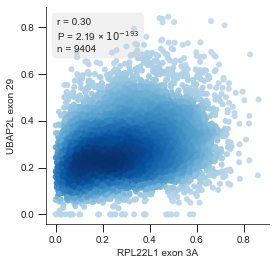

In [9]:
plt.figure(figsize=(4, 4))

many.visuals.dense_regression(
    1-tcga_a3ss[
        "ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
    ],
    tcga_se[
        "ENSG00000143569.14_ES_1_154241382:154241430:154241837:154241888:154242675:154243040_154241837:154241888"
    ],
    "spearman",
    colormap="Blues",
    cmap_offset=1,
    text_pos=(0.05, 0.95),
)

plt.xlabel("RPL22L1 exon 3A")
plt.ylabel("UBAP2L exon 29"

plt.savefig("../plots/TCGA_RPL22L1-3A_UBAP2L-29.pdf", bbox_inches="tight", dpi=512)